In [1]:
#Import of necessary libraries to work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/measurements.csv')
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [3]:
n_cols = []
for i in range(len(df.columns)):
    n_cols.append(df.columns[i].lower().replace(' ', '_'))
df.columns = n_cols
    
df.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   ac             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill_liters  13 non-null     object
 11  refill_gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
sum(df.duplicated())

0

In [6]:
df['distance'] = df['distance'].str.replace(',', '.').astype(float)
df['consume'] = df['consume'].str.replace(',', '.').astype(float)
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)

In [7]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [8]:
df.dtypes['distance']

dtype('float64')

In [9]:
round(df.isna().sum()/len(df),4)*100 

distance          0.00
consume           0.00
speed             0.00
temp_inside       3.09
temp_outside      0.00
specials         76.03
gas_type          0.00
ac                0.00
rain              0.00
sun               0.00
refill_liters    96.65
refill_gas       96.65
dtype: float64

In [10]:
df = df.dropna(subset=['temp_inside'])

In [11]:
round(df.isna().sum()/len(df),4)*100 

distance          0.00
consume           0.00
speed             0.00
temp_inside       0.00
temp_outside      0.00
specials         75.80
gas_type          0.00
ac                0.00
rain              0.00
sun               0.00
refill_liters    96.54
refill_gas       96.54
dtype: float64

In [12]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN


In [13]:
df['specials'].value_counts()

rain                  31
sun                   26
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC sun                 1
half rain half sun     1
AC Sun                 1
ac rain                1
AC snow                1
Name: specials, dtype: int64

In [14]:
df.drop('specials', axis=1, inplace=True) #we have duplicate columns

In [15]:
df['refill_liters'].value_counts(dropna = False)

NaN     363
45        2
39        2
37,7      2
38        1
41        1
37,2      1
37,6      1
10        1
37        1
38,3      1
Name: refill_liters, dtype: int64

In [16]:
df['refill_liters'] = df['refill_liters'].str.replace(',', '.').astype(float)

In [17]:
df['refill_liters'].value_counts(dropna = False)

NaN     363
37.7      2
39.0      2
45.0      2
37.2      1
38.3      1
37.6      1
37.0      1
41.0      1
10.0      1
38.0      1
Name: refill_liters, dtype: int64

In [18]:
df['refill_liters'] = df['refill_liters'].fillna(0)

In [19]:
df['refill_liters'].value_counts(dropna = False)

0.0     363
37.7      2
39.0      2
45.0      2
37.2      1
38.3      1
37.6      1
37.0      1
41.0      1
10.0      1
38.0      1
Name: refill_liters, dtype: int64

In [20]:
df['refill_gas'].value_counts(dropna = False)

NaN     363
SP98      8
E10       5
Name: refill_gas, dtype: int64

In [21]:
df['refill_gas'] = df['refill_gas'].fillna('not refilled')

In [22]:
df['refill_gas'].value_counts(dropna = False)

not refilled    363
SP98              8
E10               5
Name: refill_gas, dtype: int64

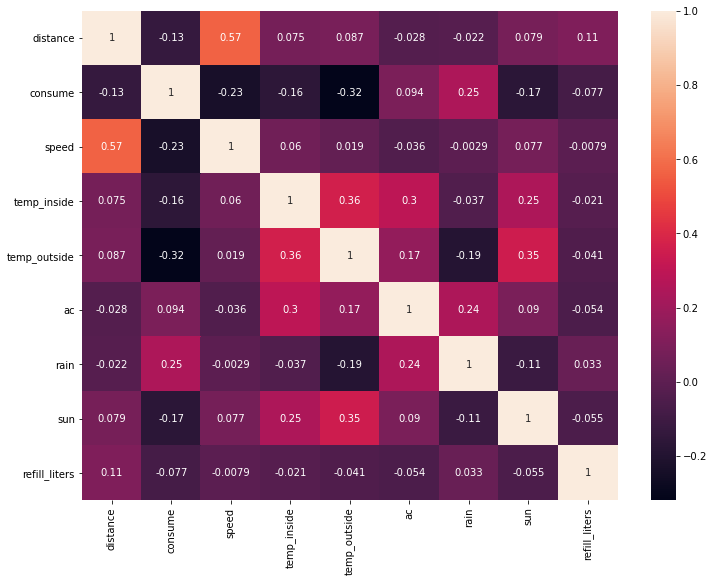

In [23]:
plt.figure(figsize=(12, 9))
correlations_matrix = df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [24]:
df.to_csv('data/m_clean.csv', index = False)

## Exploratory data

In [25]:
numeric = df.select_dtypes(include = np.number)
categorical = df.select_dtypes(include = np.object)

### Check the normality of the numerical variables visually

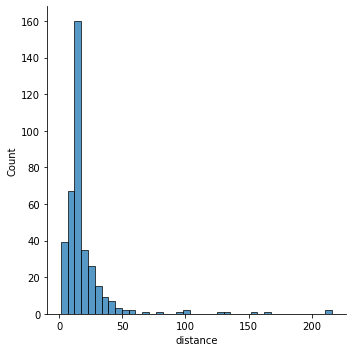

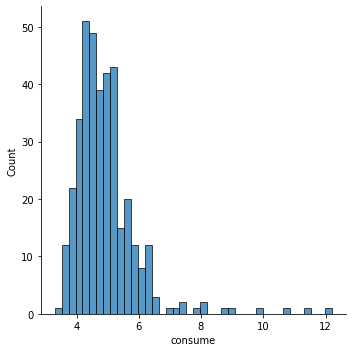

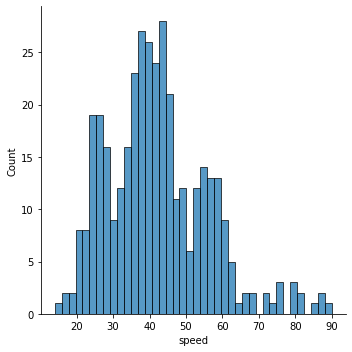

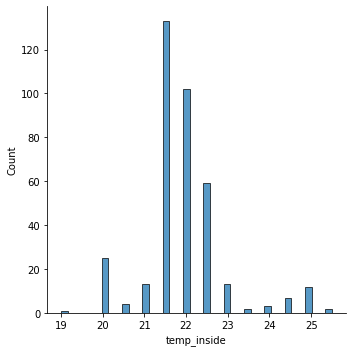

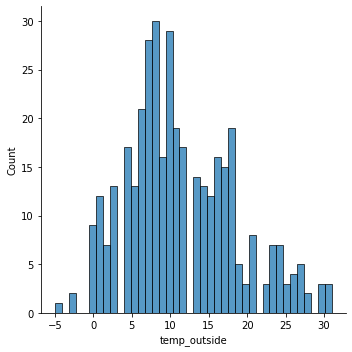

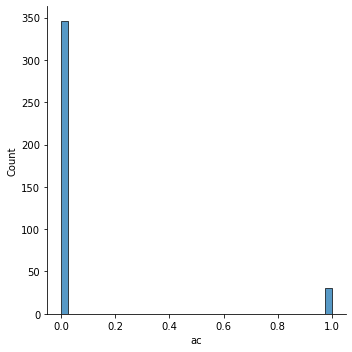

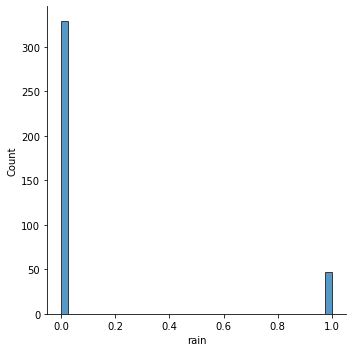

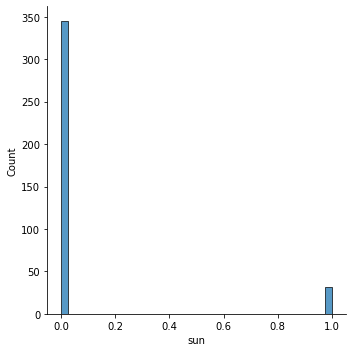

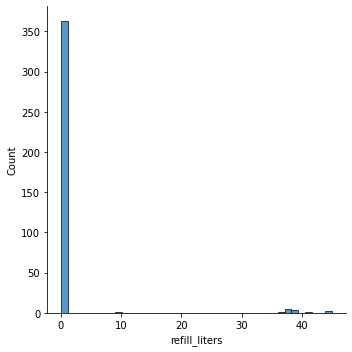

In [26]:
for i in numeric.columns:
    sns.displot(x = i, data = numeric, bins=40)
    plt.show()

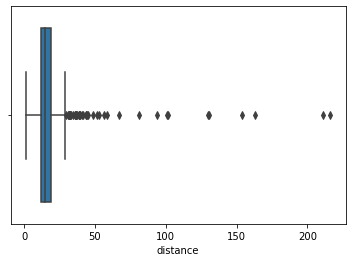

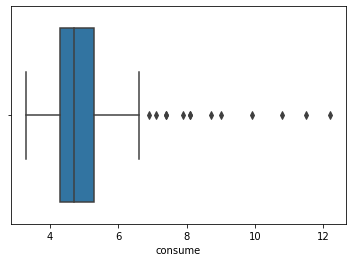

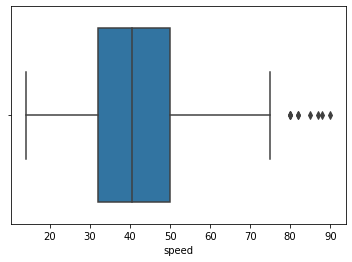

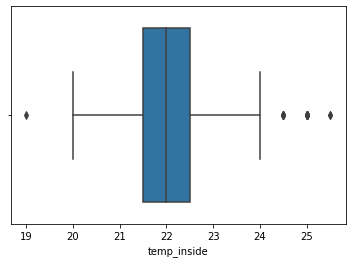

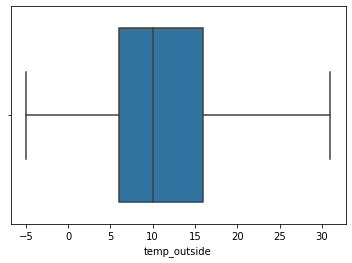

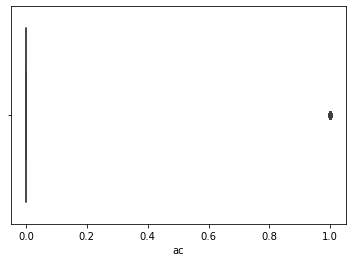

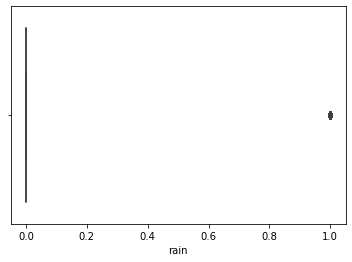

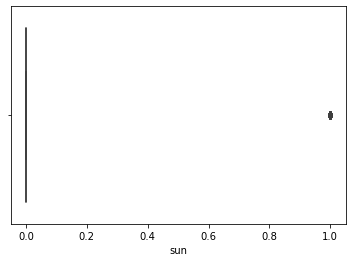

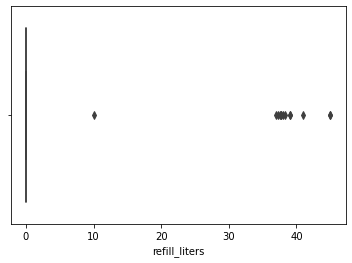

In [27]:
for i in numeric.columns:
    sns.boxplot(x = i, data = numeric)
    plt.show()

###  Removing some outliers

In [28]:
iqr_1= np.nanpercentile(numeric['speed'],75) - np.nanpercentile(numeric['speed'],25)
upper_limit_1 = np.nanpercentile(numeric['speed'],75) + 1.5*iqr_1
extraordinary_points_1 = numeric[numeric['speed'] > upper_limit_1] 

iqr_2= np.nanpercentile(numeric['distance'],75) - np.nanpercentile(numeric['distance'],25)
upper_limit_2 = np.nanpercentile(numeric['distance'],75) + 1.5*iqr_2
extraordinary_points_3 = numeric[numeric['distance'] > upper_limit_2] 

# This checks the number of points that will be removed
print('speed:', len(extraordinary_points_1))
print('distance:', len(extraordinary_points_3))

speed: 9
distance: 45


In [29]:
numeric = numeric[numeric['speed'] < upper_limit_1]
numeric = numeric[numeric['distance'] < upper_limit_2 ]

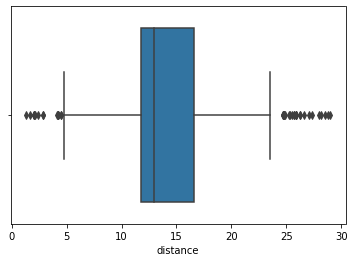

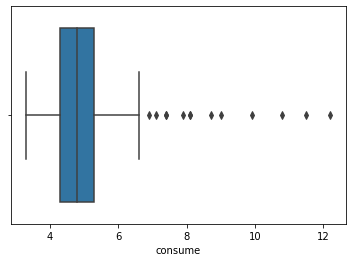

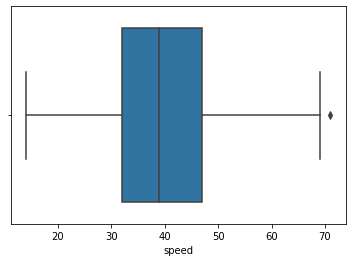

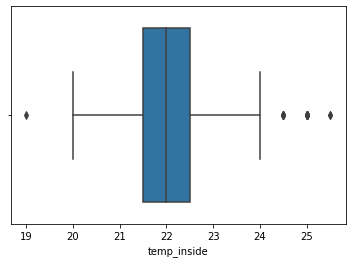

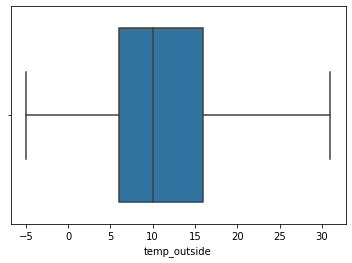

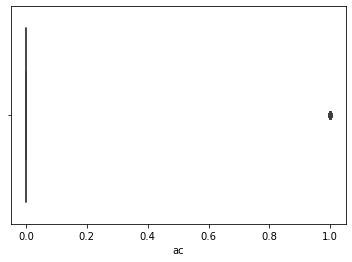

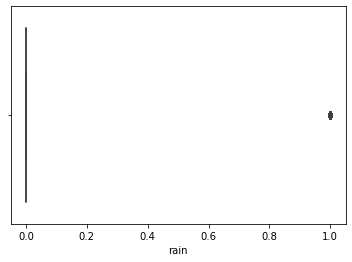

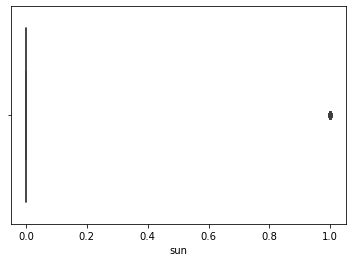

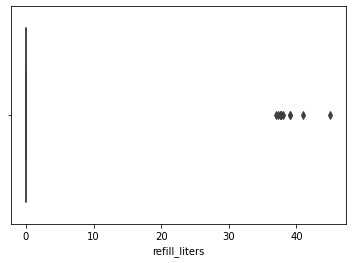

In [30]:
for i in numeric.columns:
    sns.boxplot(x = i, data = numeric)
    plt.show()

### Plot all the categorical variables with the proper plot

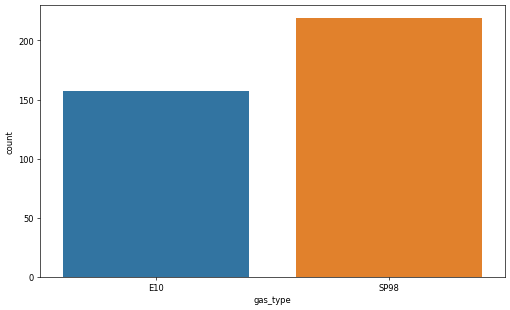

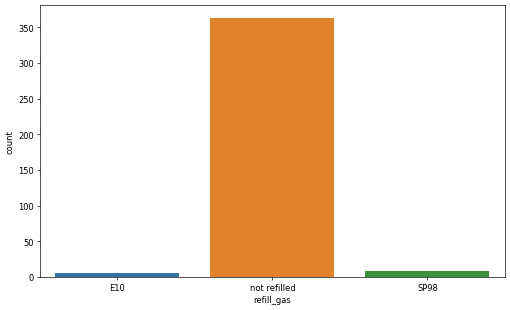

In [31]:
for i in categorical.columns:
    plt.figure(figsize=(10,6), dpi=60)
    sns.countplot(x=categorical[i], data=categorical)
    plt.show()